датасет сгененрован командами:

``` python extract.py -b 34 -d 2011 2012 2013 -c all -t 5 ```


In [205]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.models import Sequential,Model
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, Activation

%matplotlib inline

In [206]:
df_train = pd.DataFrame(pd.read_pickle("train34/train.pickle"))
df_test = pd.DataFrame(pd.read_pickle("test34/test.pickle"))

In [207]:
df_train.head()

,features,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [208]:
def features_to_matrix(dataset):
    pixs = dataset['features'].apply(pd.Series)
    pixs = pixs.rename(columns = lambda x: 'pix_' + str(x))
    return pixs

In [209]:
x_train = features_to_matrix(df_train[:70000])
x_test = features_to_matrix(df_test)
x_train = pd.concat([x_train, features_to_matrix(df_train[70000:])], axis=0)
x_train.shape

(94145, 1156)

In [210]:
y_test = df_test['label']
y_test = y_test.apply(pd.Series)
y_test = y_test.rename(columns = lambda x: 'class_' + str(x))

In [211]:
y_train = df_train['label']
y_train = y_train.apply(pd.Series)
y_train = y_train.rename(columns = lambda x: 'class_' + str(x))
y_train.shape

(94145, 101)

In [212]:
x_reshaped = x_train.values.reshape((x_train.shape[0], 34, 34, 1))
x_test_reshaped = x_test.values.reshape(x_test.shape[0], 34, 34, 1)

In [213]:
hidden_size = 50
classes_num = y_train.shape[1]
classes_num

101

In [214]:
model = Sequential()
model.add(Conv2D(7, kernel_size=7, input_shape=(34,34,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Conv2D(22, kernel_size=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(classes_num, activation='softmax'))

In [215]:
optimazer = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [216]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [217]:
history = model.fit(x_reshaped, y_train, batch_size=128, validation_split=0.2, epochs=13)

Train on 75316 samples, validate on 18829 samples
Epoch 1/13
75316/75316 [==============================] - 19s 258us/step - loss: 1.1690 - accuracy: 0.7081 - val_loss: 0.5659 - val_accuracy: 0.8400
Epoch 2/13
75316/75316 [==============================] - 16s 212us/step - loss: 0.5512 - accuracy: 0.8458 - val_loss: 0.4541 - val_accuracy: 0.8682
Epoch 3/13
75316/75316 [==============================] - 15s 204us/step - loss: 0.4646 - accuracy: 0.8674 - val_loss: 0.3782 - val_accuracy: 0.8925
Epoch 4/13
75316/75316 [==============================] - 15s 206us/step - loss: 0.4119 - accuracy: 0.8819 - val_loss: 0.3441 - val_accuracy: 0.8936
Epoch 5/13
75316/75316 [==============================] - 15s 200us/step - loss: 0.3782 - accuracy: 0.8887 - val_loss: 0.3481 - val_accuracy: 0.8991
Epoch 6/13
75316/75316 [==============================] - 15s 194us/step - loss: 0.3524 - accuracy: 0.8961 - val_loss: 0.3027 - val_accuracy: 0.9127
Epoch 7/13
75316/75316 [==============================] 

In [218]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

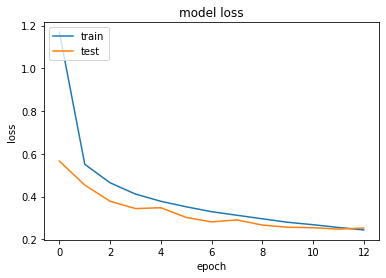

In [219]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

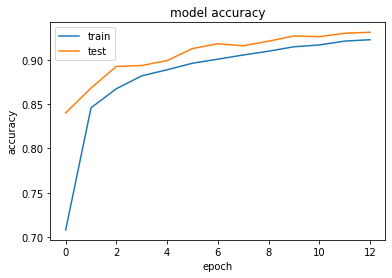

In [220]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [221]:
score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

11576/11576 [==============================] - 1s 60us/step


(0.5433870896377807, 0.8616966009140015)

In [222]:
model = Sequential()
model.add(Conv2D(7, kernel_size=7, input_shape=(34,34,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Conv2D(22, kernel_size=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(classes_num, activation='softmax'))

In [223]:
optimazer = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [224]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [225]:
history = model.fit(x_reshaped, y_train, batch_size=128, epochs=14)

Epoch 1/14
94145/94145 [==============================] - 17s 181us/step - loss: 0.9908 - accuracy: 0.7504
Epoch 2/14
94145/94145 [==============================] - 17s 180us/step - loss: 0.5014 - accuracy: 0.8590
Epoch 3/14
94145/94145 [==============================] - 17s 177us/step - loss: 0.4264 - accuracy: 0.8791s - los
Epoch 4/14
94145/94145 [==============================] - 17s 178us/step - loss: 0.3836 - accuracy: 0.8879
Epoch 5/14
94145/94145 [==============================] - 17s 178us/step - loss: 0.3521 - accuracy: 0.8961s - loss: 0.3527 - ac
Epoch 6/14
94145/94145 [==============================] - 17s 178us/step - loss: 0.3254 - accuracy: 0.9027
Epoch 7/14
94145/94145 [==============================] - 17s 179us/step - loss: 0.3059 - accuracy: 0.9082
Epoch 8/14
94145/94145 [==============================] - 17s 178us/step - loss: 0.2887 - accuracy: 0.9127
Epoch 9/14
94145/94145 [==============================] - 17s 178us/step - loss: 0.2728 - accuracy: 0.9165
Epoch 10/

In [226]:
score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

11576/11576 [==============================] - 1s 61us/step


(0.5332699886213604, 0.8645473122596741)

In [227]:
import pickle

with open('model34.obj', 'wb') as f:
    pickle.dump(model, f)

In [230]:
with open('model34.obj', 'rb') as f:
    saved_model = pickle.load(f)
    score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

11576/11576 [==============================] - 1s 58us/step


(0.5332699886213604, 0.8645473122596741)